<h1 style="font-weight:bold;"><i style="color:teal;">MACHINE LEARNING</i></h1>

<h5 style="font-weight:bold;"><i style="color:teal;">By:</i></h5>
<i style="color: black; font-weight:bold;"><br/> - Safae NABET<br/> - Hanae ELKORRI</i><br/><br/>

<h2 style="font-weight:bold;"><i style="color:tomato;">Clustering using the K-means method:</i></h2>

We want to split the customers of a hotel, based on three variables that describe their bookings, into segments to see which ones present profit potential for the hotel.

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
df = pd.read_csv("hotel_data.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'changed_room', 'customer_type_Group',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'country

In [4]:
print(df['children'].unique())
print(df["babies"].unique())
print(df["adults"].unique())

[ 0.  1.  2. 10.  3.]
[ 0  1  2 10  9]
[ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]


In [5]:
df["humans"] = df["babies"] + df["children"] + df["adults"]

In [6]:
indexNames = df[ df['hotel'] == 1 ].index
df0 = df.drop(indexNames , inplace=False)

In [7]:
print(df.shape)
print(df0.shape)

(118898, 44)
(79302, 44)


In [8]:
df1 = df0.loc[:, ['lead_time','adr', 'humans']]

In [9]:
df1.head()

,lead_time,adr,humans
39596,6,0.0,1.0
39597,88,76.5,2.0
39598,65,68.0,1.0
39599,92,76.5,2.0
39600,100,76.5,2.0


In [10]:
df2 = df1.sample(n=500, random_state=7)

<IPython.core.display.Javascript object>


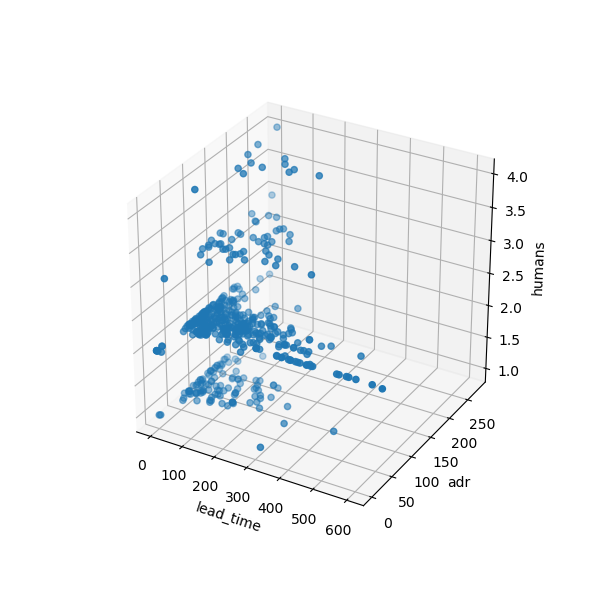

In [11]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
X = df2['lead_time']
Y = df2['adr']
Z = df2['humans']
ax.set_xlabel('lead_time')
ax.set_ylabel('adr')
ax.set_zlabel('humans')
ax.scatter(X, Y, Z)

In [12]:
X_std = StandardScaler().fit_transform(df2)

#### Number of clusters = 2:

In [13]:
km0 = KMeans(n_clusters=2, max_iter=100)
km0.fit(X_std)
centroids = km0.cluster_centers_
label0 = km0.labels_
print(np.unique(label0))

[0 1]


<IPython.core.display.Javascript object>


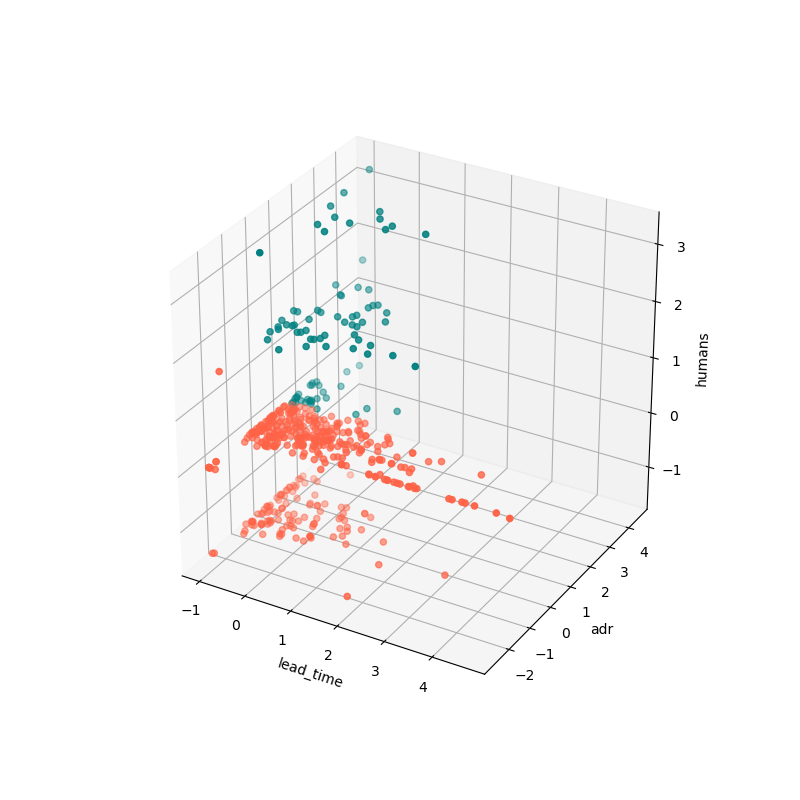

In [14]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
X00 = X_std[km0.labels_ == 0, 0] 
Y00 = X_std[km0.labels_ == 0, 1]
Z00 = X_std[km0.labels_ == 0, 2]
X01 = X_std[km0.labels_ == 1, 0] 
Y01 = X_std[km0.labels_ == 1, 1]
Z01 = X_std[km0.labels_ == 1, 2]
ax.set_xlabel('lead_time')
ax.set_ylabel('adr')
ax.set_zlabel("humans")
ax.scatter(X00, Y00, Z00, c='teal', label='cluster 1')
ax.scatter(X01, Y01, Z01, c='tomato', label='cluster 2')

In [15]:
score0 = silhouette_score(X_std, label0, metric='euclidean')
print('Silhouetter Score: %.3f' % score0)

Silhouetter Score: 0.366


We change the number of max iterations to see if it will affect the results. It seems like the results did not change:

In [16]:
km0 = KMeans(n_clusters=2, max_iter=1000)
km0.fit(X_std)
centroids = km0.cluster_centers_
label0 = km0.labels_
print(np.unique(label0))

[0 1]


<IPython.core.display.Javascript object>


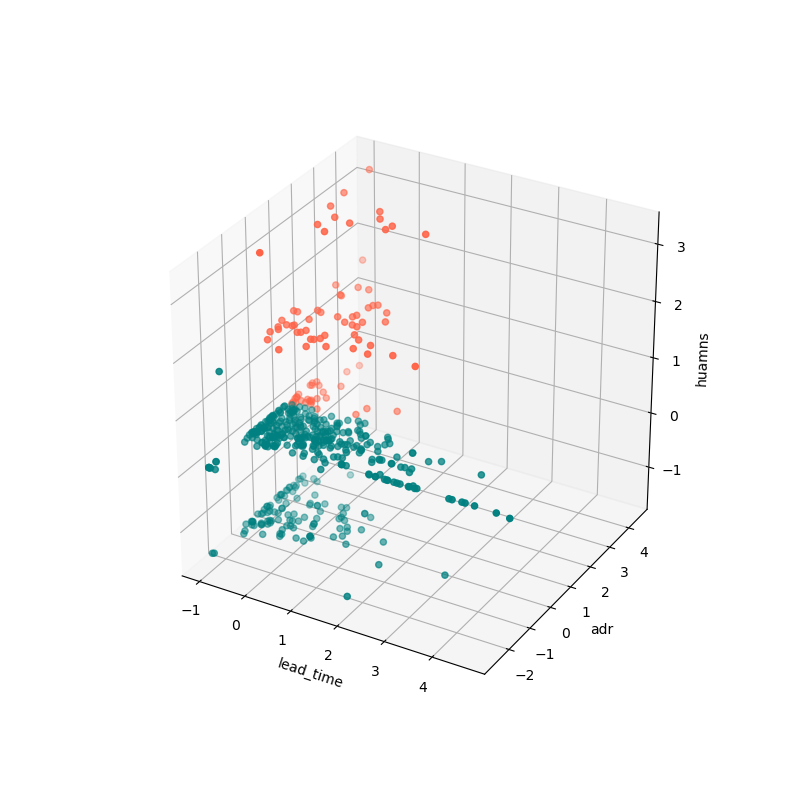

In [17]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
X00 = X_std[km0.labels_ == 0, 0] 
Y00 = X_std[km0.labels_ == 0, 1]
Z00 = X_std[km0.labels_ == 0, 2]
X01 = X_std[km0.labels_ == 1, 0] 
Y01 = X_std[km0.labels_ == 1, 1]
Z01 = X_std[km0.labels_ == 1, 2]
ax.set_xlabel('lead_time')
ax.set_ylabel('adr')
ax.set_zlabel("huamns")
ax.scatter(X00, Y00, Z00, c='teal', label='cluster 1')
ax.scatter(X01, Y01, Z01, c='tomato', label='cluster 2')

#### Number of clusters = 3:

In [18]:
km1 = KMeans(n_clusters=3, max_iter=100)
km1.fit(X_std)
centroids = km1.cluster_centers_
label1 = km1.labels_
print(np.unique(label1))

[0 1 2]


<IPython.core.display.Javascript object>


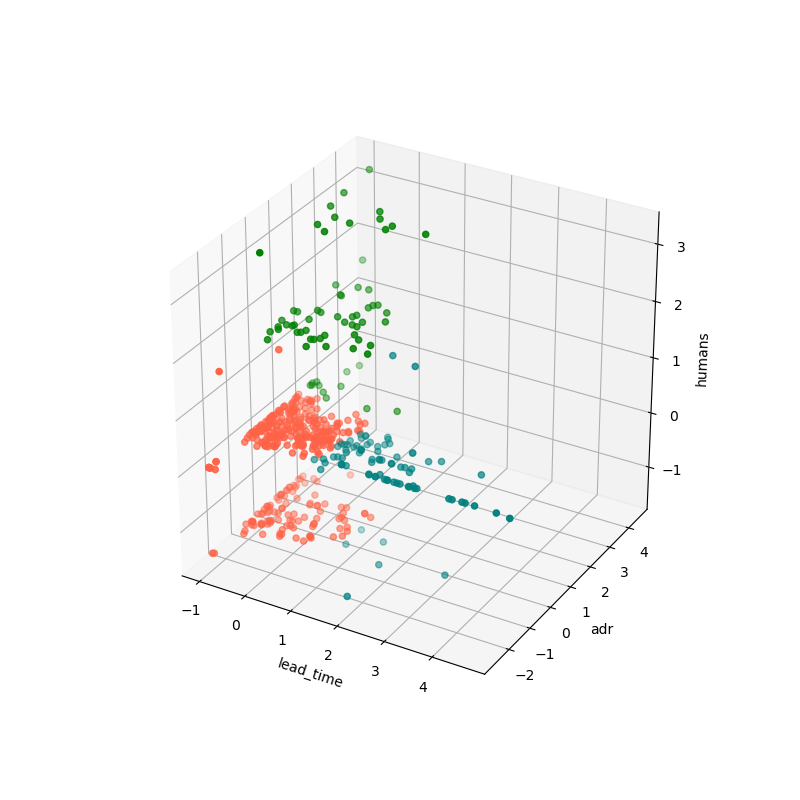

In [19]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('lead_time')
ax.set_ylabel('adr')
ax.set_zlabel("humans")
c = ["teal", "tomato", "green"]
for i in range(3):
    X = X_std[km1.labels_ == i, 0] 
    Y = X_std[km1.labels_ == i, 1]
    Z = X_std[km1.labels_ == i, 2]
    ax.scatter(X, Y, Z, c=c[i], label='cluster'+str(i))

In [20]:
score1 = silhouette_score(X_std, label1, metric='euclidean')
print('Silhouetter Score: %.3f' % score1)

Silhouetter Score: 0.369


#### Number of clusters = 4:

In [21]:
km2 = KMeans(n_clusters=4, max_iter=100)
km2.fit(X_std)
centroids = km2.cluster_centers_
label2 = km2.labels_
print(np.unique(label2))

[0 1 2 3]


<IPython.core.display.Javascript object>


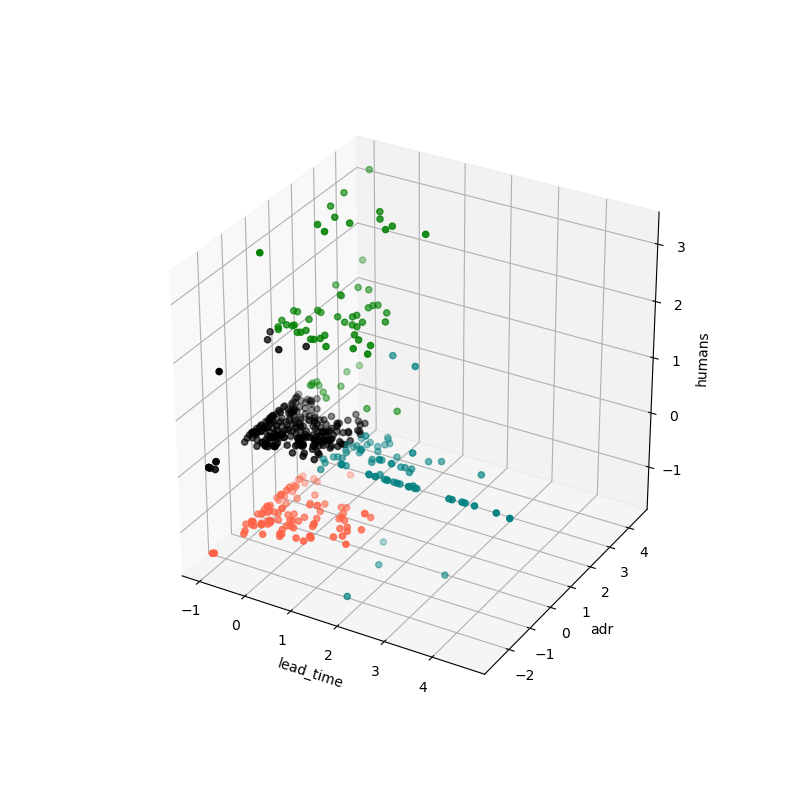

In [22]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('lead_time')
ax.set_ylabel('adr')
ax.set_zlabel("humans")
c = ["teal", "tomato", "green", "black"]
for i in range(4):
    X = X_std[km2.labels_ == i, 0] 
    Y = X_std[km2.labels_ == i, 1]
    Z = X_std[km2.labels_ == i, 2]
    ax.scatter(X, Y, Z, c=c[i], label='cluster'+str(i))

In [23]:
score2 = silhouette_score(X_std, label2, metric='euclidean')
print('Silhouetter Score: %.3f' % score2)

Silhouetter Score: 0.382


#### Number of clusters = 5:

In [24]:
km3 = KMeans(n_clusters=5, max_iter=100)
km3.fit(X_std)
centroids = km3.cluster_centers_
label3 = km3.labels_
print(np.unique(label3))

[0 1 2 3 4]


<IPython.core.display.Javascript object>


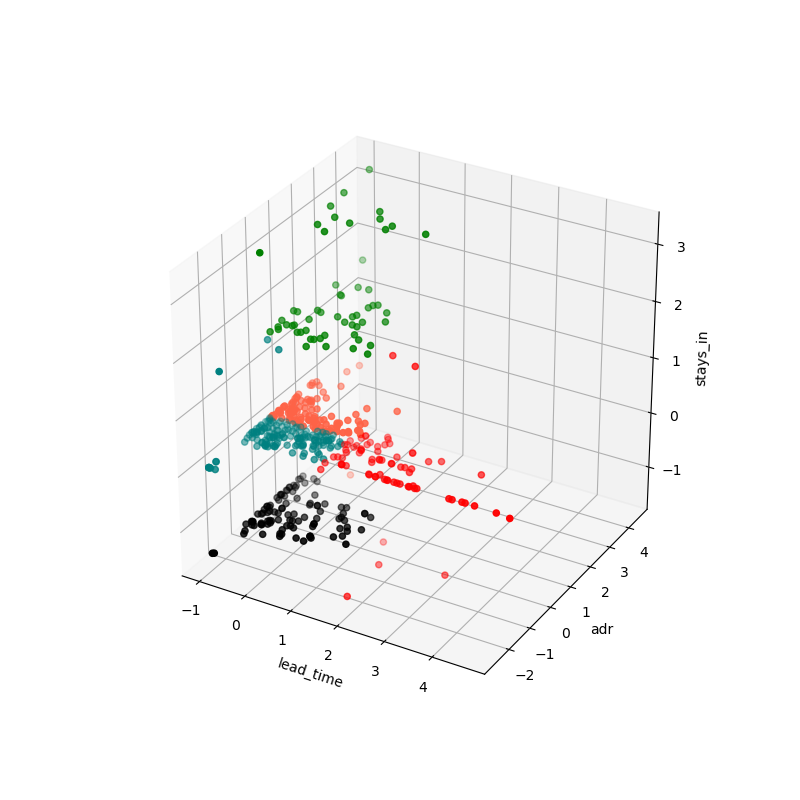

In [25]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('lead_time')
ax.set_ylabel('adr')
ax.set_zlabel("stays_in")
c = ["teal", "tomato", "green", "black", "red"]
for i in range(5):
    X = X_std[km3.labels_ == i, 0] 
    Y = X_std[km3.labels_ == i, 1]
    Z = X_std[km3.labels_ == i, 2]
    ax.scatter(X, Y, Z, c=c[i], label='cluster'+str(i))

In [26]:
score3 = silhouette_score(X_std, label3, metric='euclidean')
print('Silhouetter Score: %.3f' % score3)

Silhouetter Score: 0.342


### Elbow method :

<IPython.core.display.Javascript object>


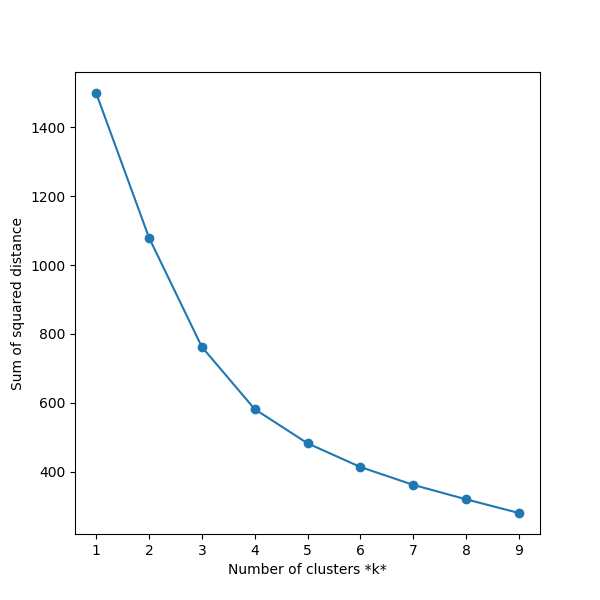

Text(0, 0.5, 'Sum of squared distance')

In [27]:
sse = []
list_k = list(range(1, 10))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')